In [1]:
import pandas as pd 
import yfinance as yf
import datetime
import numpy as np
import bs4 as bs
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.request import urlopen
import pandas as pd
import numpy as np
import time
import re
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
symbol = input('Please enter ticker of firm to analyze: ')
start = input('Please enter start date to analyze in format "YYYY-MM-DD": ')
end = input('Please enter end date to analyze in format "YYYY-MM-DD": ')
freq = input('Please enter frequency of returns to analyze (i.e.,  1d, 5d, 1wk, 1mo, 3mo: ')
debt_structure= input('Please input debt structure: constant debt or constant D/E')
riskfree= input('Please input the risk free rate')
marketreturn=input('Please input the market return rate')
tax_rate= 0.21
#need exception h}andling if there are nans

Please enter ticker of firm to analyze: NVDA
Please enter start date to analyze in format "YYYY-MM-DD": 2010-12-31
Please enter end date to analyze in format "YYYY-MM-DD": 2020-12-31
Please enter frequency of returns to analyze (i.e.,  1d, 5d, 1wk, 1mo, 3mo: 1mo
Please input debt structure: constant debt or constant D/Econst
Please input the risk free rate.05
Please input the market return rate.095


In [3]:
riskfree= (float(riskfree))
marketreturn= (float(riskfree))

In [4]:
data = yf.download(f'{symbol} SPY',start = start,end=end,interval = freq)
data

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  NVDA         SPY        NVDA         SPY        NVDA   
Date                                                                     
2011-01-01    5.493962  104.433495    5.980000  128.679993    6.262500   
2011-02-01    5.204565  108.061234    5.665000  133.149994    6.542500   
2011-03-01    4.239906  107.606773    4.615000  132.589996    5.747500   
2011-03-18         NaN         NaN         NaN         NaN         NaN   
2011-04-01    4.593614  111.204193    5.000000  136.429993    5.110000   
...                ...         ...         ...         ...         ...   
2020-09-18         NaN         NaN         NaN         NaN         NaN   
2020-10-01  125.208961  322.004059  125.339996  326.540009  143.485001   
2020-11-01  133.874878  357.030640  134.014999  362.059998  146.914993   
2020-12-01  130.413513  368.686462  130.550003  373.880005  137.312500   
2020-12-18         NaN         NaN         NaN         NaN         NaN   

                               Low                    Open              \
                   SPY        NVDA         SPY        NVDA         SPY   
Date                                                                     
2011-01-01  130.350006    3.855000  125.699997    3.880000  126.709999   
2011-02-01  134.690002    5.445000  129.380005    6.032500  129.460007   
2011-03-01  133.690002    4.252500  125.279999    5.675000  133.570007   
2011-03-18         NaN         NaN         NaN         NaN         NaN   
2011-04-01  136.570007    4.207500  129.509995    4.675000  133.410004   
...                ...         ...         ...         ...         ...   
2020-09-18         NaN         NaN         NaN         NaN         NaN   
2020-10-01  354.019989  123.000000  322.600006  137.580002  337.690002   
2020-11-01  364.380005  123.949997  327.239990  126.577499  330.200012   
2020-12-01  378.459991  127.632500  362.029999  134.922501  365.570007   
2020-12-18         NaN         NaN         NaN         NaN         NaN   

                  Volume                
                    NVDA           SPY  
Date                                    
2011-01-01  3.273688e+09  2.860315e+09  
2011-02-01  2.402576e+09  2.820074e+09  
2011-03-01  2.759758e+09  4.787459e+09  
2011-03-18           NaN           NaN  
2011-04-01  1.532207e+09  2.812718e+09  
...                  ...           ...  
2020-09-18           NaN           NaN  
2020-10-01  8.022356e+08  1.629016e+09  
2020-11-01  7.594820e+08  1.535244e+09  
2020-12-01  5.120996e+08  1.344542e+09  
2020-12-18           NaN           NaN  

[166 rows x 12 columns]

In [5]:
data.dropna(axis=0,how='all',inplace=True)
data = pd.DataFrame(data)
data = pd.DataFrame(data['Close'])
data[:5]

,NVDA,SPY
Date,,
2011-01-01,5.980,128.679993
2011-02-01,5.665,133.149994
2011-03-01,4.615,132.589996
2011-04-01,5.000,136.429993
2011-05-01,5.010,134.899994


In [6]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
df = first_table

In [7]:
df.head()


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [8]:
df2=df[df['Symbol']==symbol]
sector=df2['GICS Sub-Industry'].squeeze()
sector

'Semiconductors'

In [9]:
df3=df[df['GICS Sub-Industry']==sector].sample(n=5,replace=True)
df3

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
324,MPWR,Monolithic Power Systems,reports,Information Technology,Semiconductors,"Kirkland, Washington",2021-02-12,1280452,1997
317,MU,Micron Technology,reports,Information Technology,Semiconductors,"Boise, Idaho",1994-09-27,723125,1978
390,QRVO,Qorvo,reports,Information Technology,Semiconductors,"Greensboro, North Carolina",2015-06-11,1604778,2015
349,NVDA,Nvidia,reports,Information Technology,Semiconductors,"Santa Clara, California",2001-11-30,1045810,1993
324,MPWR,Monolithic Power Systems,reports,Information Technology,Semiconductors,"Kirkland, Washington",2021-02-12,1280452,1997


In [10]:
comp2=df3['Symbol'][1:2].squeeze()
comp2

'MU'

In [11]:
comp3=df3['Symbol'][2:3].squeeze()
comp3

'QRVO'

In [12]:
comp4=df3['Symbol'][3:4].squeeze()
comp4

'NVDA'

In [13]:
#DEBT EQUITY RATIO
FMP_API = "2a3b1c3b6cd7c197fd1e956a00d0e1b1"

bs    = "balance-sheet-statement"
tickers = [symbol]
     
bs_list = []
     
for ticker in tickers:
    url = "https://financialmodelingprep.com/api/v3/" + bs + "/" + ticker + "?limit=120&apikey=" + FMP_API
    bs = pd.read_json(url)
    bs.set_index('date', inplace=True)
     
    bs[symbol] = bs.totalLiabilities / bs.totalStockholdersEquity
    bs_list.append(bs[ticker])
     
#df_final = pd.concat(df_list, axis=1)
#print(df_final)
deratio=bs[symbol][0]
deratio

0.7043153969099627

In [14]:
#DEBT EQUITY RATIO
FMP_API = "2a3b1c3b6cd7c197fd1e956a00d0e1b1"

bs    = "balance-sheet-statement"
tickers = [comp2]
     
bs_list = []
     
for ticker in tickers:
    url = "https://financialmodelingprep.com/api/v3/" + bs + "/" + comp2 + "?limit=120&apikey=" + FMP_API
    bs = pd.read_json(url)
    bs.set_index('date', inplace=True)
     
    bs[comp2] = bs.totalLiabilities / bs.totalStockholdersEquity
    bs_list.append(bs[ticker])
     
#df_final = pd.concat(df_list, axis=1)
#print(df_final)
deratio2=bs[comp2][0]
deratio2

0.3395169917829422

In [15]:
#DEBT EQUITY RATIO
FMP_API = "2a3b1c3b6cd7c197fd1e956a00d0e1b1"

bs    = "balance-sheet-statement"
tickers = [comp3]
     
bs_list = []
     
for ticker in tickers:
    url = "https://financialmodelingprep.com/api/v3/" + bs + "/" + comp3 + "?limit=120&apikey=" + FMP_API
    bs = pd.read_json(url)
    bs.set_index('date', inplace=True)
     
    bs[comp3] = bs.totalLiabilities / bs.totalStockholdersEquity
    bs_list.append(bs[comp3])
     
#df_final = pd.concat(df_list, axis=1)
#print(df_final)
deratio3=bs[comp3][0]
deratio3

0.5599064678658797

In [16]:
#DEBT EQUITY RATIO
FMP_API = "2a3b1c3b6cd7c197fd1e956a00d0e1b1"

bs    = "balance-sheet-statement"
tickers = [comp4]
     
bs_list = []
     
for ticker in tickers:
    url = "https://financialmodelingprep.com/api/v3/" + bs + "/" + comp4 + "?limit=120&apikey=" + FMP_API
    bs = pd.read_json(url)
    bs.set_index('date', inplace=True)
     
    bs[comp4] = bs.totalLiabilities / bs.totalStockholdersEquity
    bs_list.append(bs[comp4])
     
#df_final = pd.concat(df_list, axis=1)
#print(df_final)
deratio4=bs[comp4][0]
deratio4

0.7043153969099627

In [17]:
#Automatically determine comparable companies based upon SIC code, GICS code, or any other methodology
#(or, at a minimum, query the user for a set of comparable tickers, but make sure you do exception handling if
#the dates/data are unavailable for chosen tickers). 


In [18]:
compde_list = [deratio2, deratio3, deratio4]
compde= sum(compde_list)/len(compde_list)
print("The comparative debt equity ratio is is ", round(compde,8))

The comparative debt equity ratio is is  0.53457962


In [19]:
#collect  effective tax rate (21%), D/E ratio()#pull, equity beta (run regression)

In [20]:
#for each comparable (and the target company), you will have to query the user as to which capital structure
#assumption applies (e.g., constant debt or constant D/E).

In [21]:
#Run the unlever/relever process and determine the equity beta and report to the user. 

In [22]:
#calculate the monthly return
stock_ret = data[{symbol}].pct_change()
mark_ret = data['SPY'].pct_change()

In [23]:
data['SPY'] = data['SPY']/100

In [24]:
data['Stock Returns'] = stock_ret
data['Market Returns'] = mark_ret

In [25]:
data['Stock Returns'] = data['Stock Returns'].apply(lambda x: float(x))
data['Market Returns'] = data['Market Returns'].apply(lambda x: float(x))
data['SPY'] = data['SPY'].apply(lambda x: float(x))

In [26]:
#calculate risk premium of the stock and the market risk premium.
data['Stock Premia'] = data['Stock Returns'] - data['SPY']
data['Market Premia'] = data['Market Returns'] - data['SPY']
data.iloc[0:5]

,NVDA,SPY,Stock Returns,Market Returns,Stock Premia,Market Premia
Date,,,,,,
2011-01-01,5.980,1.2868,NaN,NaN,NaN,NaN
2011-02-01,5.665,1.3315,-0.052676,0.034737,-1.384176,-1.296763
2011-03-01,4.615,1.3259,-0.185349,-0.004206,-1.511249,-1.330106
2011-04-01,5.000,1.3643,0.083424,0.028961,-1.280876,-1.335338
2011-05-01,5.010,1.3490,0.002000,-0.011215,-1.347000,-1.360214


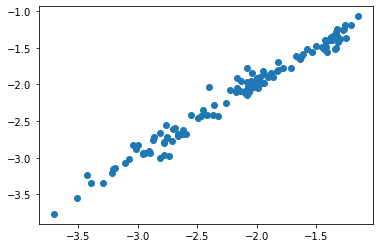

In [27]:
#scatter plot for risk premium of the stock and the market risk premium.
x = np.array(data['Market Premia'][1:])
y = np.array(data['Stock Premia'][1:])
plt.scatter(x,y)

In [28]:
#time series regression with summary statistics
import statsmodels.formula.api as smf
d = { "x": pd.Series(x), "y": pd.Series(y)}
df = pd.DataFrame(d)
mod = smf.ols('y ~ x', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4840.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           4.90e-97
Time:                        15:54:24   Log-Likelihood:                 112.05
No. Observations:                 119   AIC:                            -220.1
Df Residuals:                     117   BIC:                            -214.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0395      0.032     -1.252      0.2

In [29]:
#time series regression with summary statistics
x = np.array(data['Market Premia'][1:]).reshape((-1,1))
y = np.array(data['Stock Premia'][1:]).reshape((-1,1))
model = LinearRegression()
model = model.fit(x,y)


In [30]:
comps = yf.download(f'{comp2},{comp3},{comp4}, SPY',start = start,end=end,interval = freq)
comps

[*********************100%***********************]  4 of 4 completed


Adj Close                                          Close  \
                   MU        NVDA        QRVO         SPY         MU   
Date                                                                   
2011-01-01  10.525288    5.493963         NaN  104.433495  10.540000   
2011-02-01  11.114464    5.204565         NaN  108.061241  11.130000   
2011-03-01  11.453990    4.239907         NaN  107.606743  11.470000   
2011-03-18        NaN         NaN         NaN         NaN        NaN   
2011-04-01  11.304198    4.593613         NaN  111.204201  11.320000   
...               ...         ...         ...         ...        ...   
2020-09-18        NaN         NaN         NaN         NaN        NaN   
2020-10-01  50.269730  125.208969  127.360001  322.004059  50.340000   
2020-11-01  64.000534  133.874893  156.679993  357.030670  64.089996   
2020-12-01  75.075058  130.413528  166.270004  368.686493  75.180000   
2020-12-18        NaN         NaN         NaN         NaN        NaN   

                                                     High              ...  \
                  NVDA        QRVO         SPY         MU        NVDA  ...   
Date                                                                   ...   
2011-01-01    5.980000         NaN  128.679993  10.770000    6.262500  ...   
2011-02-01    5.665000         NaN  133.149994  11.950000    6.542500  ...   
2011-03-01    4.615000         NaN  132.589996  11.890000    5.747500  ...   
2011-03-18         NaN         NaN         NaN        NaN         NaN  ...   
2011-04-01    5.000000         NaN  136.429993  11.830000    5.110000  ...   
...                ...         ...         ...        ...         ...  ...   
2020-09-18         NaN         NaN         NaN        NaN         NaN  ...   
2020-10-01  125.339996  127.360001  326.540009  54.849998  143.485001  ...   
2020-11-01  134.014999  156.679993  362.059998  65.250000  146.914993  ...   
2020-12-01  130.550003  166.270004  373.880005  75.680000  137.312500  ...   
2020-12-18         NaN         NaN         NaN        NaN         NaN  ...   

                   Low                   Open                          \
                  QRVO         SPY         MU        NVDA        QRVO   
Date                                                                    
2011-01-01         NaN  125.699997   8.140000    3.880000         NaN   
2011-02-01         NaN  129.380005  10.670000    6.032500         NaN   
2011-03-01         NaN  125.279999  11.200000    5.675000         NaN   
2011-03-18         NaN         NaN        NaN         NaN         NaN   
2011-04-01         NaN  129.509995  11.530000    4.675000         NaN   
...                ...         ...        ...         ...         ...   
2020-09-18         NaN         NaN        NaN         NaN         NaN   
2020-10-01  124.559998  322.600006  47.099998  137.580002  132.085007   
2020-11-01  126.519997  327.239990  50.790001  126.577499  129.889999   
2020-12-01  151.440002  362.029999  65.250000  134.922501  158.800003   
2020-12-18         NaN         NaN        NaN         NaN         NaN   

                              Volume                                          
                   SPY            MU          NVDA        QRVO           SPY  
Date                                                                          
2011-01-01  126.709999  9.266748e+08  3.273688e+09         NaN  2.860315e+09  
2011-02-01  129.460007  7.889980e+08  2.402576e+09         NaN  2.820074e+09  
2011-03-01  133.570007  1.003912e+09  2.759758e+09         NaN  4.787459e+09  
2011-03-18         NaN           NaN           NaN         NaN           NaN  
2011-04-01  133.410004  6.283603e+08  1.532207e+09         NaN  2.812718e+09  
...                ...           ...           ...         ...           ...  
2020-09-18         NaN           NaN           NaN         NaN           NaN  
2020-10-01  337.690002  3.513476e+08  8.022356e+08  21511400.0  1.629016e+09  
2020-11-01  330.20

In [31]:
#time series regression with summary statistics
print('Summary Statistics')
print('-'*100)
print(f'The number of observations in the regression is: ',len(data)-1)
print('The correlation of the risk premia of the market and your stock is: ',round(model.score(x,y)**(1/2),4))
print('The R-squared of the regression for the SCL is: ',round(model.score(x,y),3))
print('The Adjused R-squared of the regression for the SCL is: ',round(1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1),3))
print('The standard error of the regression is: ',round(res.scale**.5,5))
print('The t-test value of the beta is: ',round((res.params[1]-1)/res.bse[1],3))

Summary Statistics
----------------------------------------------------------------------------------------------------
The number of observations in the regression is:  119
The correlation of the risk premia of the market and your stock is:  0.9881
The R-squared of the regression for the SCL is:  0.976
The Adjused R-squared of the regression for the SCL is:  0.976
The standard error of the regression is:  0.09518
The t-test value of the beta is:  -2.037


In [32]:
comps.dropna(axis=0,how='all',inplace=True)
comps = pd.DataFrame(comps)
comps = pd.DataFrame(comps['Close'])
comps[:5]

,MU,NVDA,QRVO,SPY
Date,,,,
2011-01-01,10.54,5.980,NaN,128.679993
2011-02-01,11.13,5.665,NaN,133.149994
2011-03-01,11.47,4.615,NaN,132.589996
2011-04-01,11.32,5.000,NaN,136.429993
2011-05-01,10.20,5.010,NaN,134.899994


In [33]:
comp2_ret = comps[f'{comp2}'].pct_change()
comp3_ret = comps[f'{comp3}'].pct_change()
comp4_ret = comps[f'{comp4}'].pct_change()
mark_ret = comps['SPY'].pct_change()

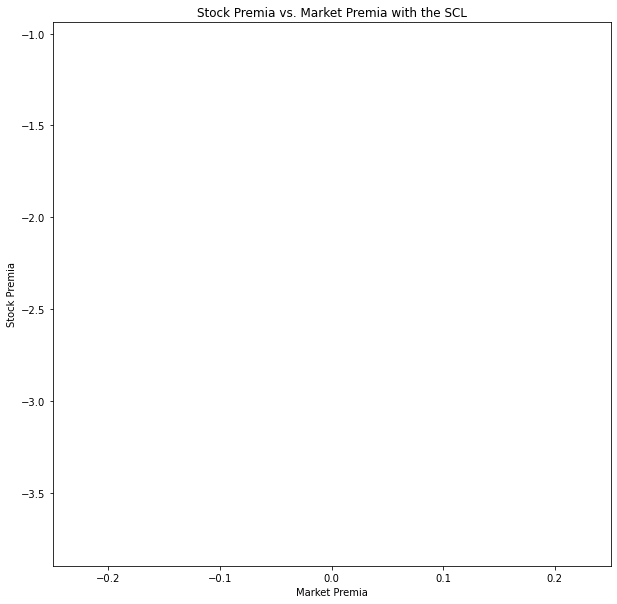

In [34]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.plot(x, y, 'o')
#predicted?
ax.set_title('Stock Premia vs. Market Premia with the SCL')
ax.set_xlabel('Market Premia')
ax.set_ylabel('Stock Premia')
ax.set_xlim([-.25,.25])
plt.show()

In [35]:
comps['SPY'] = comps['SPY']/100

In [36]:
comps['Comp2 Returns'] = comp2_ret
comps['Comp3 Returns'] = comp3_ret
comps['Comp4 Returns'] = comp4_ret
comps['Market Returns'] = mark_ret
comps['Comp2 Returns'] = comps['Comp2 Returns'].apply(lambda x: float(x))
comps['Comp3 Returns'] = comps['Comp3 Returns'].apply(lambda x: float(x))
comps['Comp4 Returns'] = comps['Comp4 Returns'].apply(lambda x: float(x))
comps['Market Returns'] = comps['Market Returns'].apply(lambda x: float(x))
comps['SPY'] = comps['SPY'].apply(lambda x: float(x))

In [37]:
comps['Comp2 Premia'] = comps['Comp2 Returns'] - comps['SPY']
comps['Comp3 Premia'] = comps['Comp3 Returns'] - comps['SPY']
comps['Comp4 Premia'] = comps['Comp4 Returns'] - comps['SPY']
comps['Market Premia'] = comps['Market Returns'] - comps['SPY']
comps.iloc[0:5]

,MU,NVDA,QRVO,SPY,Comp2 Returns,Comp3 Returns,Comp4 Returns,Market Returns,Comp2 Premia,Comp3 Premia,Comp4 Premia,Market Premia
Date,,,,,,,,,,,,
2011-01-01,10.54,5.980,NaN,1.2868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,11.13,5.665,NaN,1.3315,0.055977,NaN,-0.052676,0.034737,-1.275523,NaN,-1.384176,-1.296763
2011-03-01,11.47,4.615,NaN,1.3259,0.030548,NaN,-0.185349,-0.004206,-1.295352,NaN,-1.511249,-1.330106
2011-04-01,11.32,5.000,NaN,1.3643,-0.013078,NaN,0.083424,0.028961,-1.377378,NaN,-1.280876,-1.335338
2011-05-01,10.20,5.010,NaN,1.3490,-0.098940,NaN,0.002000,-0.011215,-1.447940,NaN,-1.347000,-1.360214


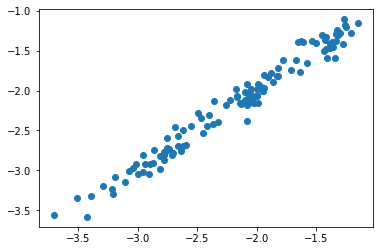

In [38]:
#scatter plot for risk premium of the stock and the market risk premium.
x = np.array(comps['Market Premia'][1:])
y2 = np.array(comps['Comp2 Premia'][1:])
plt.scatter(x,y2)

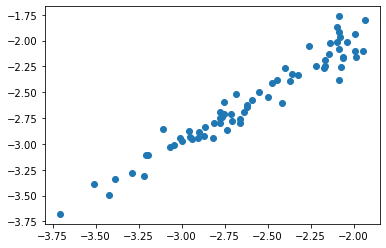

In [39]:
#time series regression with summary statistics
x = np.array(comps['Market Premia'][1:])
y3 = np.array(comps['Comp3 Premia'][1:])
plt.scatter(x,y3)

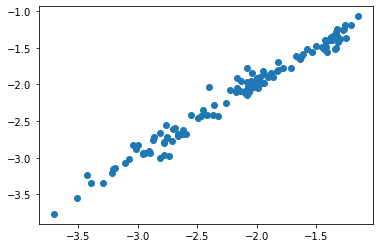

In [40]:
#scatter plot for risk premium of the stock and the market risk premium.
x = np.array(comps['Market Premia'][1:])
y4 = np.array(comps['Comp4 Premia'][1:])
plt.scatter(x,y4)

In [41]:
#time series regression with summary statistics
import statsmodels.formula.api as smf
d2 = { "x": pd.Series(x), "y2": pd.Series(y2)}
df2 = pd.DataFrame(d2)
mod = smf.ols('y2 ~ x', data=df2)
res = mod.fit()
print(res.summary())
coef2= res.params[1]
coef2

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     4022.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.87e-92
Time:                        15:54:25   Log-Likelihood:                 98.698
No. Observations:                 119   AIC:                            -193.4
Df Residuals:                     117   BIC:                            -187.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0057      0.035     -0.162      0.8

0.9908097072713562

In [42]:
#time series regression with summary statistics
import statsmodels.formula.api as smf
d3 = { "x": pd.Series(x), "y3": pd.Series(y3)}
df3 = pd.DataFrame(d3)
mod = smf.ols('y3 ~ x', data=df3)
res = mod.fit()
print(res.summary())
coef3= res.params[1]
coef3

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1051.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           4.34e-43
Time:                        15:54:25   Log-Likelihood:                 56.273
No. Observations:                  70   AIC:                            -108.5
Df Residuals:                      68   BIC:                            -104.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0666      0.079     -0.848      0.3

0.9700087164517591

In [43]:
#time series regression with summary statistics
import statsmodels.formula.api as smf
d4 = { "x": pd.Series(x), "y4": pd.Series(y4)}
df4 = pd.DataFrame(d4)
mod = smf.ols('y4 ~ x', data=df4)
res = mod.fit()
print(res.summary())
coef4= res.params[1]
coef4

                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4840.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           4.90e-97
Time:                        15:54:25   Log-Likelihood:                 112.05
No. Observations:                 119   AIC:                            -220.1
Df Residuals:                     117   BIC:                            -214.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0395      0.032     -1.252      0.2

0.9715548643252873

In [44]:
print(coef2, coef3, coef4)

0.9908097072713562 0.9700087164517591 0.9715548643252873


In [45]:
#unlever comp 1
unleveredbetac1= coef2/(1+(1-tax_rate)*deratio2)
print("The unlevered beta for comp 1 is ", round(unleveredbetac1,8))

The unlevered beta for comp 1 is  0.78126109


In [46]:
tax_rate=0.21

In [47]:
#unlever comp2
unleveredbetac2= coef3/(1+(1-tax_rate)*deratio3)
print("The unlevered beta for comp 2 is ", round(unleveredbetac2,8))

The unlevered beta for comp 2 is  0.67253079


In [48]:
#unlever comp 3
unleveredbetac3= coef4/(1+(1-tax_rate)*deratio4)
print("The unlevered beta is ", round(unleveredbetac3,8))

The unlevered beta is  0.62422844


In [49]:
compbeta_list = [unleveredbetac1, unleveredbetac2, unleveredbetac3]
compbeta = sum(compbeta_list)/len(compbeta_list)
print("The comparative beta is ", round(compbeta,8))

The comparative beta is  0.69267344


In [50]:
#calculate relevered beta
equitybeta= compbeta *(1+(1-tax_rate)*deratio)
print("The equity beta is ", round(equitybeta,8))

The equity beta is  1.07808329


In [51]:
#calculate cost of equity
costequity= riskfree + (equitybeta*(marketreturn-riskfree))
print("The cost of equity is ", costequity)


The cost of equity is  0.05
